In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [87]:
stats = pd.read_csv('..\..\data\stats.csv') #direct to stats folder; created in main.ipynb
closest_match = '180 Regen Warzone'
temp_df = stats.loc[stats['Scenario']==closest_match].copy() 
temp_df['Days']= range(1,len(temp_df['Date'])+1)

y = np.array(temp_df['Score']).reshape(-1, 1)
X = np.array(temp_df['Days'])[:, np.newaxis]


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=8)

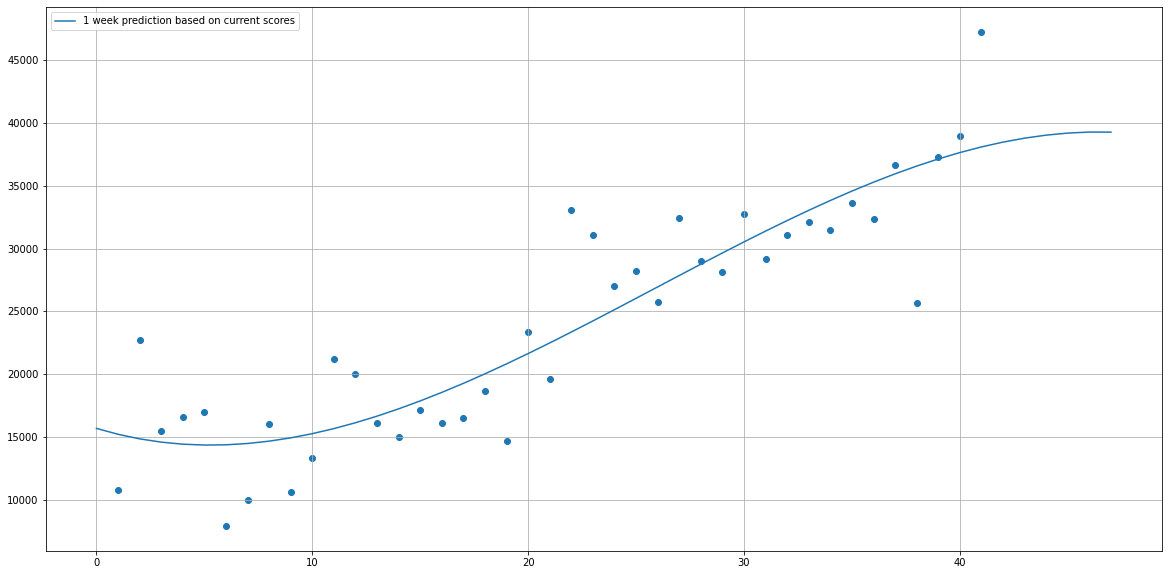

In [93]:
pr = LinearRegression()
cubic = PolynomialFeatures(degree=3)
X_cube = cubic.fit_transform(X)

X_fit = np.arange(0, X.max()+7, 1)[:, np.newaxis]
pr.fit(X_cube, y)
y_cube_fit = pr.predict(cubic.fit_transform(X_fit))

plt.figure(figsize=(20,10))
plt.grid(which='both')
plt.scatter(X, y)
plt.plot(X_fit, y_cube_fit, label='1 week prediction based on current scores')
plt.legend(loc='upper left')
plt.show()